# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Set matplotlib figure size
plt.rcParams['figure.figsize'] = (20, 4)

# Đọc dữ liệu

In [2]:
# Power dataframe
p_df = pd.read_csv('./data/W.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)

# Power factor dataframe
pf_df = pd.read_csv('./data/cosphi.csv',\
                       names=['time', 'light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker'],\
                       header=0)

light    : chiếu sáng  
socket   : ổ cắm phòng khách + bếp + ngủ  
heater   : bình nóng lạnh  
aircond1 : điều hoà 1 & 2  
aircond2 : điều hoà 3  
aircond3 : điều hoà phòng khách  
indcooker: bếp từ  

### Bảng công suất tiêu thụ

In [3]:
p_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,216.0,0,244.0,0.0,631.0,1.0
1,2020-07-15 00:01:00,0.0,210.0,0,286.0,0.0,631.0,3.5
2,2020-07-15 00:02:00,0.0,206.0,0,314.0,0.0,633.0,6.0
3,2020-07-15 00:03:00,0.0,206.0,0,254.0,0.0,632.0,3.5
4,2020-07-15 00:04:00,0.0,160.0,0,274.0,0.0,629.0,1.0
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,236.0,0,183.0,0.0,0.0,1.0
31676,2020-08-05 23:56:00,0.0,238.0,0,174.0,0.0,0.0,1.0
31677,2020-08-05 23:57:00,0.0,243.0,0,199.0,0.0,0.0,1.0
31678,2020-08-05 23:58:00,0.0,241.0,0,229.0,0.0,0.0,1.0


### Bảng hệ số công suất

In [4]:
pf_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,0.975,0.0,0.700,0.0,0.960,0.02
1,2020-07-15 00:01:00,0.0,0.955,0.0,0.815,0.0,0.960,0.06
2,2020-07-15 00:02:00,0.0,0.940,0.0,0.895,0.0,0.965,0.10
3,2020-07-15 00:03:00,0.0,0.940,0.0,0.720,0.0,0.955,0.06
4,2020-07-15 00:04:00,0.0,0.865,0.0,0.775,0.0,0.955,0.02
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,0.975,0.0,0.675,0.0,0.000,0.02
31676,2020-08-05 23:56:00,0.0,0.980,0.0,0.645,0.0,0.000,0.02
31677,2020-08-05 23:57:00,0.0,0.985,0.0,0.740,0.0,0.000,0.02
31678,2020-08-05 23:58:00,0.0,0.970,0.0,0.850,0.0,0.000,0.02


# Tính Q (Công suất phản kháng)

Tính bảng Q dựa trên bảng P và bảng cosphi  
Dựa trên công thức Q = P * tan(arccos(cosphi))

In [5]:
# Q dataframe
q_df = pd.DataFrame()
q_df['time'] = p_df['time']
column_names = ['light', 'socket', 'heater', 'aircond1', 'aircond2', 'aircond3', 'indcooker']

for col_name in column_names:
    q_df[col_name] = np.tan(np.arccos(pf_df[col_name])) * p_df[col_name]
    
q_df

,time,light,socket,heater,aircond1,aircond2,aircond3,indcooker
0,2020-07-15 00:00:00,0.0,49.226923,0.0,248.929791,0.0,184.041667,49.989999
1,2020-07-15 00:01:00,0.0,65.222218,0.0,203.344581,0.0,184.041667,58.228239
2,2020-07-15 00:02:00,0.0,74.768016,0.0,156.496947,0.0,172.025051,59.699246
3,2020-07-15 00:03:00,0.0,74.768016,0.0,244.818628,0.0,196.287817,58.228239
4,2020-07-15 00:04:00,0.0,92.813292,0.0,223.428875,0.0,195.356071,49.989999
...,...,...,...,...,...,...,...,...
31675,2020-08-05 23:55:00,0.0,53.784971,0.0,200.030584,0.0,0.000000,49.989999
31676,2020-08-05 23:56:00,0.0,48.327961,0.0,206.151577,0.0,0.000000,49.989999
31677,2020-08-05 23:57:00,0.0,42.569243,0.0,180.876712,0.0,0.000000,49.989999
31678,2020-08-05 23:58:00,0.0,60.400293,0.0,141.921453,0.0,0.000000,49.989999


# Chọn thiết bị

In [6]:
select_device = ['heater', 'indcooker', 'aircond1']

### Vẽ đồ thị của từng thiết bị

Đồ thị chỉ vẽ P  
uncomment dòng `axs[i].plot(q_df[col])` để vẽ cả đồ thị Q

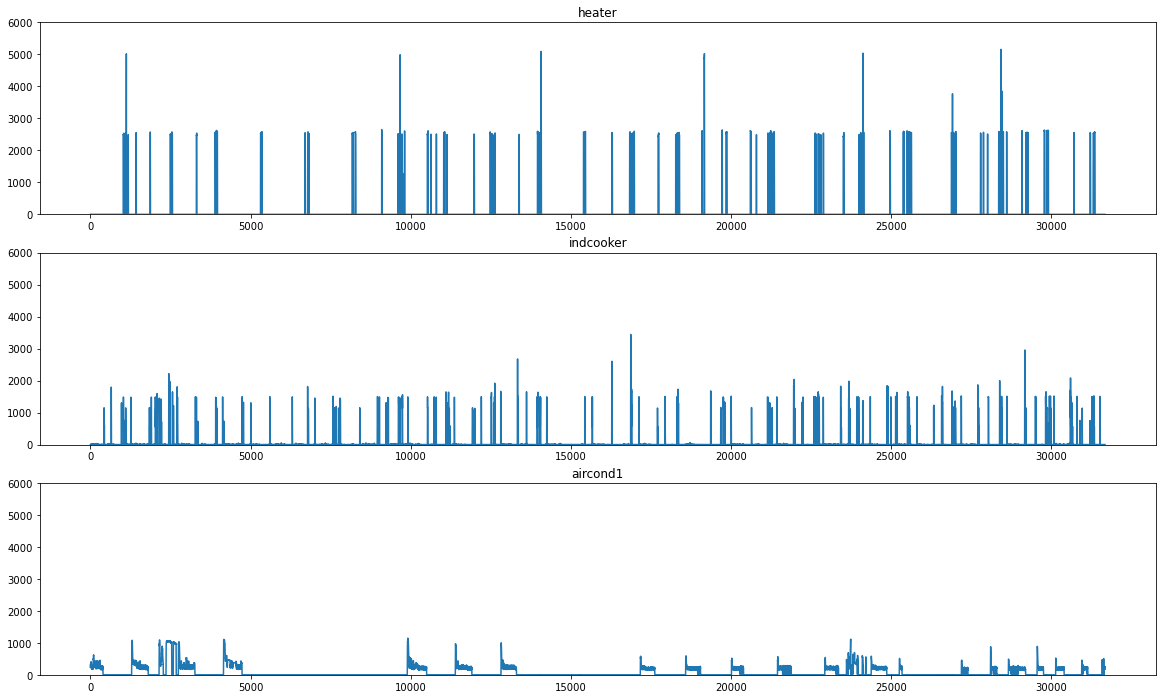

In [7]:
fig, axs = plt.subplots(len(select_device))
fig.set_figheight(4 * len(select_device))
for i, col in enumerate(select_device):
    axs[i].plot(p_df[col])
#     axs[i].plot(q_df[col])
    axs[i].set_title(col)
    axs[i].set_ylim([0,6000])

# Tính tổng P, Q

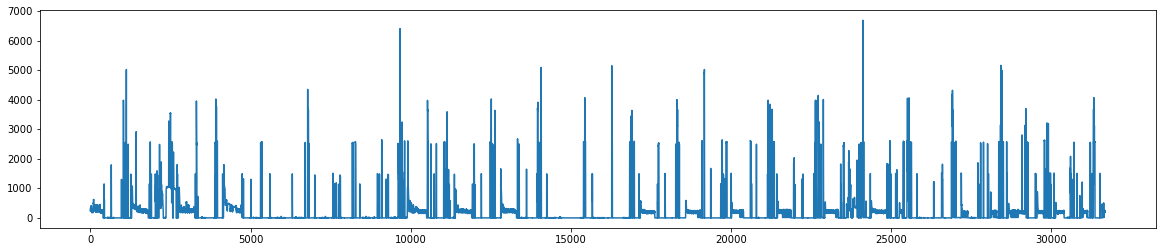

In [8]:
p_sum = p_df[select_device].sum(axis=1).to_numpy()
q_sum = q_df[select_device].sum(axis=1).to_numpy()
plt.plot(p_sum)

# Lấy các điểm có delta P và delta Q ở ngưỡng nhất định

Chỉ lấy các điểm có deltaP và deltaQ lớn hơn `min_delta_p`

`threshold` là ngưỡng công suất xác định thiết bị đang ở trạng thái bật hay tắt.

- Nhãn = 0 tương ứng với thiết bị 0 bật  
- Nhãn = 1 tương ứng với thiết bị 0 tắt  
- Nhãn = 2 tương ứng với thiết bị 1 bật  
- Nhãn = 3 tương ứng với thiết bị 1 tắt  
- ...   
- Nhãn `2 * i` tương ứng với thiết bị `i` bật  
- Nhãn `2 * i + 1` tương ứng với thiết bị `i` tắt

In [9]:
data = []
label = []
min_delta_p = 20
threshold = 50

# For each time t
for t in range(len(p_sum) - 1):
    
    # Calculate delta P and delta Q
    delta_p = p_sum[t+1] - p_sum[t]
    delta_q = q_sum[t+1] - q_sum[t]
    
    # Only consider if |delta P| > min_delta_p:
    if abs(delta_p) > min_delta_p:
        
        # For each device
        for i in range(len(select_device)):
            
            # Check if the device has just turned on or off, then add to dataset
            if p_df[select_device[i]].iloc[t] < threshold and p_df[select_device[i]].iloc[t+1] >= threshold:
                data.append([delta_p, delta_q])
                label.append(2*i)
                break
            elif p_df[select_device[i]].iloc[t] >= threshold and p_df[select_device[i]].iloc[t+1] < threshold:
                data.append([delta_p, delta_q])
                label.append(2*i+1)
                break

Tổng số điểm dữ liệu

In [10]:
print(len(data))
print(len(label))

927
927


### Phân bố nhãn lớp

Có n thiết bị tương ứng với 2n nhãn lớp

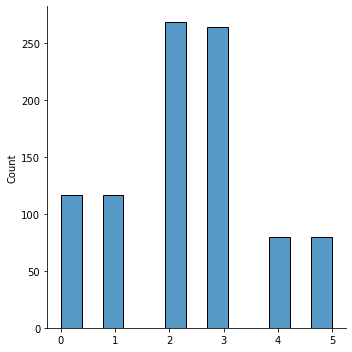

In [11]:
import seaborn as sns
sns.displot(label)

### Đưa nhãn lớp về dạng one-hot vector

- Nhãn 0 tương ứng với [1, 0, 0, .. , 0]
- Nhãn 1 tương ứng với [0, 1, 0, .. , 0]
- ... 
- Nhãn 2n - 1 tương ứng với [0, 0, 0, .., 1]

Độ dài vector = 2n (n là số thiết bị)

In [12]:
X = data

def one_hot(y):
    ret = [0 for i in range(len(select_device) * 2)]
    ret[y] = 1
    return ret
    m
y = list(map(one_hot, label))

In [13]:
data_df = pd.DataFrame(data=X, columns=['delta P', 'delta Q'])
data_df['label'] = y
data_df

,delta P,delta Q,label
0,-146.5,-28.612323,"[0, 0, 0, 0, 0, 1]"
1,573.5,884.529521,"[0, 0, 1, 0, 0, 0]"
2,-574.0,-847.121836,"[0, 0, 0, 1, 0, 0]"
3,560.0,848.667388,"[0, 0, 1, 0, 0, 0]"
4,-560.0,-848.667388,"[0, 0, 0, 1, 0, 0]"
...,...,...,...
922,52.0,118.694324,"[0, 0, 0, 0, 1, 0]"
923,-63.5,-106.033716,"[0, 0, 0, 0, 0, 1]"
924,221.5,279.556311,"[0, 0, 0, 0, 1, 0]"
925,-217.5,-113.847320,"[0, 0, 0, 0, 0, 1]"


# Chia tập train, test

Tỷ lệ chia 70-30, lấy theo thứ tự, không xáo trộn (để dễ dàng so sánh kết quả với các giải thuật hoặc mô hình khác)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Training

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', 
                    alpha=1e-5, 
                    hidden_layer_sizes=30, 
                    random_state=1, 
                    max_iter=1000, 
                    verbose=True, 
                    learning_rate='adaptive',
                    n_iter_no_change=20)
clf.fit(X_train, y_train)


Iteration 1, loss = 100.22097872
Iteration 2, loss = 91.96747038
Iteration 3, loss = 85.89475930
Iteration 4, loss = 83.38993086
Iteration 5, loss = 69.24870285
Iteration 6, loss = 57.66113816
Iteration 7, loss = 40.48450120
Iteration 8, loss = 31.76251039
Iteration 9, loss = 31.23721231
Iteration 10, loss = 30.89991276
Iteration 11, loss = 30.04654846
Iteration 12, loss = 31.26036555
Iteration 13, loss = 28.94446403
Iteration 14, loss = 27.19807777
Iteration 15, loss = 28.60995507
Iteration 16, loss = 26.77517367
Iteration 17, loss = 23.14291757
Iteration 18, loss = 23.39509087
Iteration 19, loss = 22.35810452
Iteration 20, loss = 21.49918988
Iteration 21, loss = 20.90334769
Iteration 22, loss = 20.66741965
Iteration 23, loss = 20.30800471
Iteration 24, loss = 19.88709034
Iteration 25, loss = 19.58316903
Iteration 26, loss = 19.16624189
Iteration 27, loss = 18.56746563
Iteration 28, loss = 18.15403798
Iteration 29, loss = 17.49938052
Iteration 30, loss = 16.47837192
Iteration 31, loss

Iteration 262, loss = 1.30512485
Iteration 263, loss = 1.31074587
Iteration 264, loss = 1.26232313
Iteration 265, loss = 1.27562968
Iteration 266, loss = 1.21126890
Iteration 267, loss = 1.27149131
Iteration 268, loss = 1.27542239
Iteration 269, loss = 1.50740517
Iteration 270, loss = 1.52636368
Iteration 271, loss = 1.66241988
Iteration 272, loss = 1.47191455
Iteration 273, loss = 1.48179240
Iteration 274, loss = 1.42437207
Iteration 275, loss = 1.37215371
Iteration 276, loss = 1.26745137
Iteration 277, loss = 1.23523352
Iteration 278, loss = 1.29450778
Iteration 279, loss = 1.20787939
Iteration 280, loss = 1.17426207
Iteration 281, loss = 1.16056745
Iteration 282, loss = 1.15089870
Iteration 283, loss = 1.18201927
Iteration 284, loss = 1.17606219
Iteration 285, loss = 1.13815119
Iteration 286, loss = 1.16136027
Iteration 287, loss = 1.15566301
Iteration 288, loss = 1.16885039
Iteration 289, loss = 1.17577544
Iteration 290, loss = 1.15813048
Iteration 291, loss = 1.14709849
Iteration 

Iteration 520, loss = 0.77916369
Iteration 521, loss = 0.86771344
Iteration 522, loss = 0.89379795
Iteration 523, loss = 0.84998587
Iteration 524, loss = 0.76510844
Iteration 525, loss = 0.74837569
Iteration 526, loss = 0.77356590
Iteration 527, loss = 0.86604806
Iteration 528, loss = 0.81715276
Iteration 529, loss = 0.80361464
Iteration 530, loss = 0.78247966
Iteration 531, loss = 0.77326582
Iteration 532, loss = 0.76425017
Iteration 533, loss = 0.78578006
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.


MLPClassifier(alpha=1e-05, hidden_layer_sizes=30, learning_rate='adaptive',
              max_iter=1000, n_iter_no_change=20, random_state=1, verbose=True)

# Test

In [16]:
print("accuracy=", clf.score(X_test, y_test))

accuracy= 0.8136200716845878
